In [7]:
import numpy as np
import pandas as pd
from numpy import loadtxt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import optimize
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace import tools 

In [8]:
df = pd.read_csv('AAPLs.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-31,37.474998,37.582500,37.032501,37.182499,35.199409,79383600
1,2017-08-01,37.275002,37.555000,37.102501,37.512501,35.511822,141474400
2,2017-08-02,39.820000,39.937500,39.040001,39.285000,37.189777,279747200
3,2017-08-03,39.262501,39.302502,38.755001,38.892502,36.818214,108389200
4,2017-08-04,39.017502,39.349998,38.922501,39.097500,37.012280,82239600
...,...,...,...,...,...,...,...
1254,2022-07-25,154.009995,155.039993,152.279999,152.949997,152.949997,53623900
1255,2022-07-26,152.259995,153.089996,150.800003,151.600006,151.600006,55138700
1256,2022-07-27,152.580002,157.330002,152.160004,156.789993,156.789993,78620700
1257,2022-07-28,156.979996,157.639999,154.410004,157.350006,157.350006,81378700


In [9]:
data = df["Adj Close"].values.tolist()
data

[35.199409,
 35.511822,
 37.189777,
 36.818214,
 37.01228,
 37.585003,
 37.885582,
 38.117519,
 36.9034,
 37.416611,
 37.979702,
 38.395512,
 38.241047,
 37.506893,
 37.42136,
 37.352455,
 37.963074,
 38.010593,
 37.841904,
 37.982086,
 38.364613,
 38.706749,
 38.811291,
 38.965725,
 38.977604,
 38.509556,
 38.469158,
 38.314724,
 37.689838,
 38.371742,
 38.219681,
 37.93219,
 37.606686,
 37.986835,
 37.699352,
 37.713589,
 37.081596,
 36.444836,
 36.088444,
 35.770061,
 36.385437,
 36.644417,
 36.418694,
 36.618279,
 36.544632,
 36.703815,
 36.466217,
 36.920021,
 36.89864,
 37.026943,
 37.041206,
 37.195644,
 37.064964,
 37.300182,
 37.986835,
 38.127007,
 37.958321,
 37.060204,
 37.124367,
 37.105358,
 37.326321,
 37.162373,
 37.399975,
 38.740009,
 39.611992,
 40.163212,
 39.652382,
 39.942249,
 40.985294,
 41.401093,
 41.534138,
 41.873909,
 41.788383,
 41.65007,
 41.483154,
 40.856033,
 40.317135,
 40.798798,
 40.572281,
 40.531731,
 41.28524,
 41.719227,
 41.721603,
 41.511776,


In [10]:
def plot_series(data, title='Time Series Plot', y_label='Value of X'):
    fig = plt.figure(figsize=(16, 5))
    plt.plot(data, linewidth=5)
    plt.title(title, fontsize=15)
    plt.xlabel('Time', fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    plt.grid()
    plt.show()

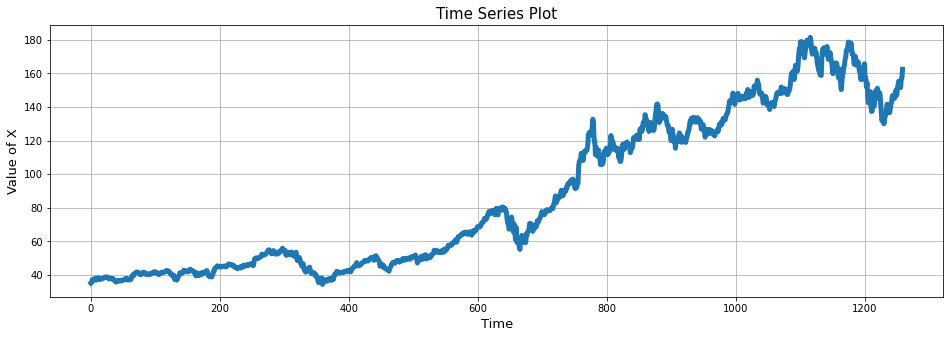

In [11]:
plotdata = plot_series(data)

In [12]:
#since the data is not stationary, we need to make the data stationary to use ARIMA model
p_threshold = 0.05

order_d = 0
X_diff = data.copy()

# loop to get stationary data 
while stattools.adfuller(X_diff)[1] > p_threshold:
    order_d += 1
    X_diff = tools.diff(X_diff)

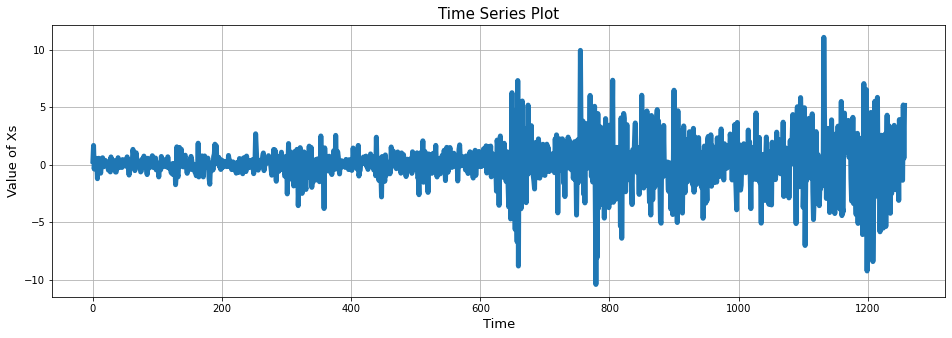

In [13]:
X_stationary = X_diff
d = order_d
plot_series(X_stationary, y_label='Value of Xs')

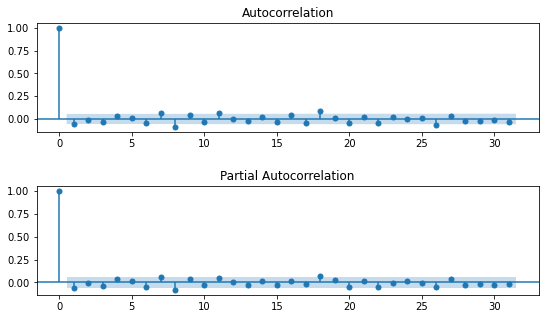

In [14]:
#Estimate Orders
def plot_graphs(X=None):
    fig = plt.figure(figsize=(9, 5))
    fig.subplots_adjust(hspace=0.5)

    # ACF plot
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(X, ax=ax1)

    # PACF plot
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(X, ax=ax2)
    plt.show()

plot_graphs(X=X_stationary)

In [73]:
#Observing the ACF plot, the ACF values appear to cut off after lag 1. So we set 𝑞̂ to 0. Similarly, from the PACF plot, the PACF values appear to cut off after lag 4, so we set 𝑝̂ to 2.
p = 2
q = 0

In [74]:
model = sm.tsa.ARIMA(data, order=(p, d, q)).fit()
print(model.summary())

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1258
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2640.510
Method:                       css-mle   S.D. of innovations              1.974
Date:                Sat, 30 Jul 2022   AIC                           5289.020
Time:                        23:40:22   BIC                           5309.569
Sample:                             1   HQIC                          5296.743
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1009      0.052      1.943      0.052      -0.001       0.203
ar.L1.D.y     -0.0615      0.028     -2.176      0.030      -0.117      -0.006
ar.L2.D.y     -0.0101      0.028     -0.357      0.7

In [75]:

# Create Training and Test
train = data[:185]
test = data[67:]

In [76]:
modell = sm.tsa.ARIMA(train, order=(p, d, q))  
fitted = modell.fit(disp=-1) 
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [77]:
len(data)

1259

[]

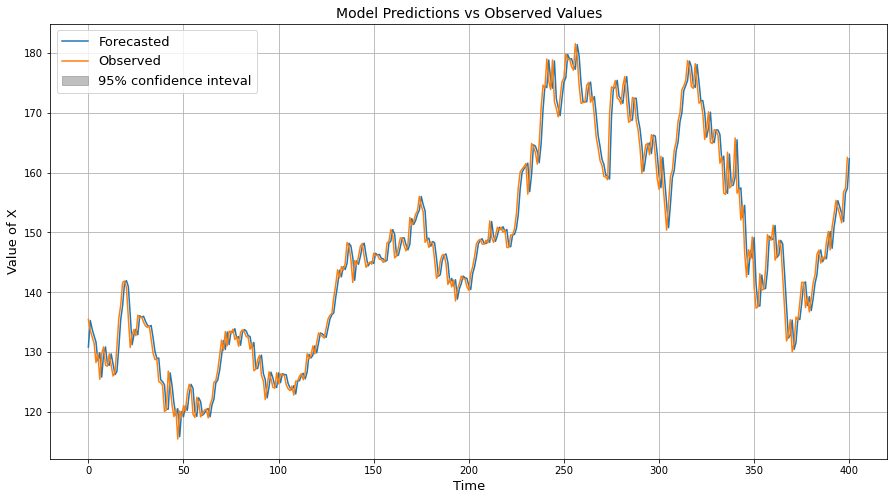

In [78]:
#We have 1259 data. We will fit 859 data and predict 400 data 


ax = plt.figure(figsize=(15, 8)).add_subplot(111)
model.plot_predict(len(data) - 400, len(data), dynamic=False, ax=ax, 
                   plot_insample=True)
plt.title('Model Predictions vs Observed Values', fontsize=14)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Value of X', fontsize=13)
plt.legend(
    ['Forecasted', 'Observed', '95% confidence inteval'], 
    fontsize=13
)
plt.grid()
plt.plot()